In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def generator(N):
    x_mean = np.array([2.,3.,2.5,3.5])
    x_cov = np.array([[1.,0.75,-1.02,0.],[0.75,2.,-0.8,0.2],[-1.02,-0.8,1.4,0.],[0.,0.2,0.,2.6]])
    X = np.random.multivariate_normal(x_mean,x_cov,N)
    return X

In [8]:
def norm_prob(N):
    X = generator(N)
    indices = np.argmax(X, axis=1)
    index = np.zeros(4)
    for i in range(0,N):
        index[indices[i]] += 1
       # i += 1
    p = index / N
    return p

In [22]:
def antithetic_prob(N):
    x_mean = np.array([2.,3.,2.5,3.5])
    X_primal = generator(int(N/2))
    X_antithetic = 2*x_mean - X_primal
    X = np.r_[X_primal, X_antithetic]
    
    indices = np.argmax(X, axis=1)
    index = np.zeros(4)
    for i in range(0,N):
        index[indices[i]] += 1
       # i += 1
    p = index / N
    return p
    

In [27]:
def gumbel_prob(N):
    X = generator(N)
    
    e = np.random.gumbel(0,1,N)
    e = e.reshape(N,1)
    
    u = X + e
    
    indices = np.argmax(u, axis=1)
    index = np.zeros(4)
    for i in range(0,N):
        index[indices[i]] += 1
       # i += 1
    p = index / N
    return p

In [28]:
N = 30000

p = np.zeros(shape=(3,int(N/100),4))

j=0

for i in np.arange (100,(N+100),100):
    p[0][j] = norm_prob(i)
    p[1][j] = antithetic_prob(i)
    p[2][j] = gumbel_prob(i)
    
    j += 1


In [53]:
labels = ["Multivariate Normal", "Antithetic Variate", "Gumbel Variate"]

X = np.arange (100, (N+100), 100)

def plot_res(i):
    plt.plot(X, p[i][:,0], color="r", label='x1')
    plt.plot(X, p[i][:,1], "g", label='x2')
    plt.plot(X, p[i][:,2], "b", label='x3')
    plt.plot(X, p[i][:,3], "k", label='x4')
    
    plt.ylim(0,1)
    plt.grid()
    plt.xlabel('Number of Experiments')
    plt.ylabel('Estimated Probabilities')
    
    plt.title("Probability with %s"%labels[i])
    
    plt.legend()
    plt.show()

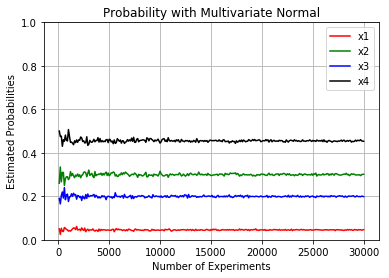

In [54]:
plot_res(0)

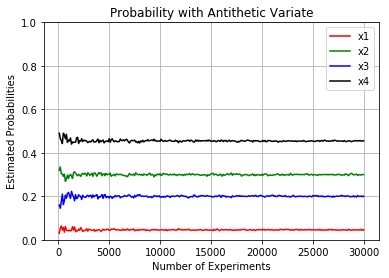

In [55]:
plot_res(1)

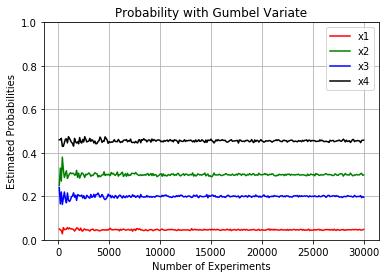

In [56]:
plot_res(2)